## Загрузка и первичный анализ данных
Для выполнения задания был выбран датасет библиотеки sklearn с данными о характеристиках вин и их рейтингом цен.

https://scikit-learn.org/stable/modules/classes.html?highlight=sklearn%20datasets#module-sklearn.datasets

In [1]:
from operator import itemgetter
import pydotplus
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from IPython.display import Image
from io import StringIO
import numpy as np
import pandas as pd
import seaborn as sns
import math
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import *
%matplotlib inline
sns.set(style="ticks")

In [2]:
ds = load_wine()
data = pd.DataFrame(data= np.c_[ds['data'], ds['target']],
                 columns= list(ds['feature_names']) + ['class'])
data.dtypes

alcohol                         float64
malic_acid                      float64
ash                             float64
alcalinity_of_ash               float64
magnesium                       float64
total_phenols                   float64
flavanoids                      float64
nonflavanoid_phenols            float64
proanthocyanins                 float64
color_intensity                 float64
hue                             float64
od280/od315_of_diluted_wines    float64
proline                         float64
class                           float64
dtype: object

In [4]:
data.shape

(178, 14)

In [5]:
data

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2.0


In [6]:
np.unique(data['class'])

array([0., 1., 2.])

In [7]:
np.where(pd.isnull(data))

(array([], dtype=int64), array([], dtype=int64))

В датасете нет пропусков

Будем решать задачу классификации. Поскольку в датасете имеется большое количество столблов с небинарными данными, то мы будем использовать сетрики для оценки моделей с небинарными данными. Для оценки обученных моделей планируется использование метрики accuracy, Confusion matrix. Предварительно проверим, можно ли применить их.

In [8]:
np.unique(data['class'], return_counts=True)

(array([0., 1., 2.]), array([59, 71, 48], dtype=int64))

Классы сбалансированы. Можно использовать метрику accuracy.

Корелляционная матрица

In [9]:
data.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


## Разделение выборки на обучающую и тестовую.

In [3]:
y=np.array(data["class"])
X=np.array(data.drop(["class"], axis=1))
X, y

(array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

Разделение выборки на обучающую и тестовую

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,shuffle=True)

Выборка разделена на обучающую X_train, y_train и тестовую X_test, y_test

## Обучение моделей

### LogisticRegression

In [5]:
LRmodel = LogisticRegression(max_iter=10000, random_state=0)

In [6]:
LRmodel.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=0)

In [7]:
predLR_y_test = LRmodel.predict(X_test)
predLR_y_test

array([2., 1., 0., 1., 0., 2., 1., 0., 2., 1., 0., 0., 1., 0., 1., 1., 2.,
       0., 1., 0., 0., 1., 1., 0., 0., 2., 0., 0., 0., 2., 1., 2., 2., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 2., 0., 0., 0., 1., 0., 0., 0., 1.,
       2., 2., 0.])

Оценка качества

Accuracy

In [15]:
accuracy_score(y_test, predLR_y_test)

0.9629629629629629

Confusion matrix

In [16]:
# Для небинарной классификации
confusion_matrix(y_test, predLR_y_test, labels=[0, 1, 2])

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  1, 11]], dtype=int64)

C:\Users\Alexandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


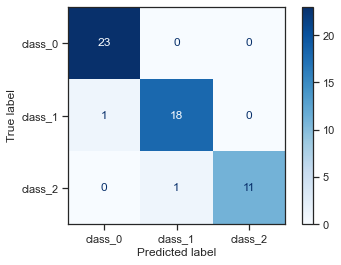

In [17]:
plot_confusion_matrix(LRmodel, X_test, y_test, 
                      display_labels=ds.target_names, cmap=plt.cm.Blues)

### SVM

In [8]:
SVCmodel = SVC(kernel='linear', C=2, gamma="auto", decision_function_shape='ovo')
SVCmodel.fit(X_train, y_train)

SVC(C=2, decision_function_shape='ovo', gamma='auto', kernel='linear')

In [9]:
predSVC_y_test = SVCmodel.predict(X_test)
predSVC_y_test

array([2., 1., 0., 1., 0., 2., 1., 0., 2., 1., 0., 0., 1., 0., 1., 1., 2.,
       0., 1., 0., 0., 1., 1., 0., 0., 2., 0., 0., 0., 2., 1., 2., 2., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 2., 0., 0., 0., 1., 0., 0., 0., 1.,
       2., 2., 0.])

In [10]:
y_test

array([2., 1., 0., 1., 0., 2., 1., 0., 2., 1., 0., 0., 1., 0., 1., 1., 2.,
       0., 1., 0., 0., 1., 2., 1., 0., 2., 0., 0., 0., 2., 1., 2., 2., 0.,
       1., 1., 1., 1., 1., 0., 0., 1., 2., 0., 0., 0., 1., 0., 0., 0., 1.,
       2., 2., 0.])

Оценка качества

Accuracy

In [21]:
accuracy_score(y_test, predSVC_y_test)

0.9629629629629629

Confusion matrix

In [22]:
confusion_matrix(y_test, predSVC_y_test, labels=[0, 1, 2])

array([[23,  0,  0],
       [ 1, 18,  0],
       [ 0,  1, 11]], dtype=int64)

C:\Users\Alexandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


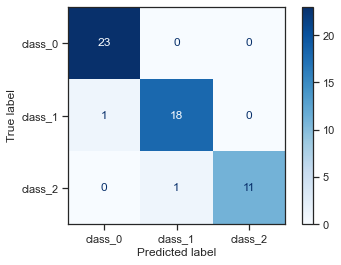

In [23]:
plot_confusion_matrix(SVCmodel, X_test, y_test, 
                      display_labels=ds.target_names, cmap=plt.cm.Blues)

### Дерево решений

In [11]:
DecisionTreeModel = DecisionTreeClassifier()
DecisionTreeModel.fit(X_train, y_train)

DecisionTreeClassifier()

In [12]:
predTree_y_test = DecisionTreeModel.predict(X_test)
predTree_y_test

array([2., 1., 0., 1., 0., 2., 1., 0., 2., 1., 0., 1., 1., 0., 1., 1., 2.,
       0., 1., 0., 0., 1., 2., 0., 0., 2., 0., 0., 0., 2., 1., 1., 2., 0.,
       1., 1., 1., 1., 1., 0., 0., 2., 2., 2., 0., 0., 1., 0., 0., 0., 1.,
       2., 2., 0.])

Оценка качества

Accuracy

In [26]:
accuracy_score(y_test, predTree_y_test)

0.9259259259259259

Confusion matrix

In [27]:
confusion_matrix(y_test, predTree_y_test, labels=[0, 1, 2])

array([[22,  0,  1],
       [ 1, 17,  1],
       [ 1,  0, 11]], dtype=int64)

C:\Users\Alexandra\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


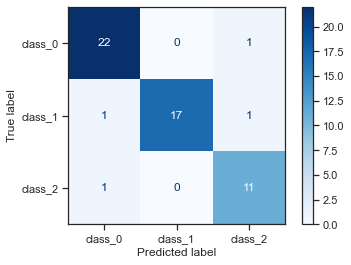

In [28]:
plot_confusion_matrix(DecisionTreeModel, X_test, y_test, 
                      display_labels=ds.target_names, cmap=plt.cm.Blues)

### Общие результаты оценок

In [13]:
results_metrics = dict()
model_list = ['logistic_regression', 'svc','tree']

In [14]:
results_metrics['accuracy'] = [accuracy_score(y_test, predLR_y_test), accuracy_score(y_test, predSVC_y_test), accuracy_score(y_test, predTree_y_test)] 

In [15]:
results_metrics['confusion_matrix'] = [2, 2, 2]

C:\Users\Alexandra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

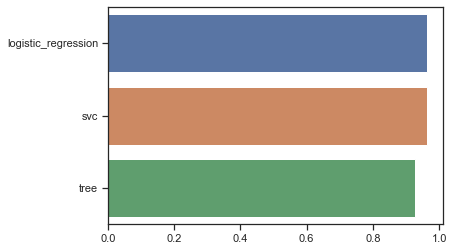

In [32]:
sns.barplot(results_metrics['accuracy'], model_list)

C:\Users\Alexandra\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

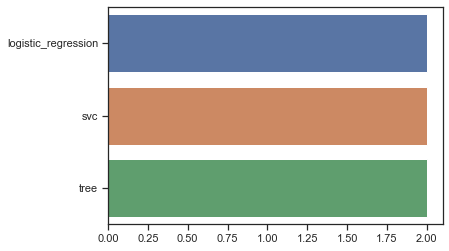

In [33]:
sns.barplot(results_metrics['confusion_matrix'], model_list)

Оценки моделей в каждой метрике имеют соответственно равные значения

## Важность признаков в дереве решений

Дерево решений в png

In [16]:
def get_png_tree(tree_model_param, feature_names_param):
    dot_data = StringIO()
    export_graphviz(tree_model_param, out_file=dot_data, feature_names=feature_names_param,
                    filled=True, rounded=True, special_characters=True)
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph.create_png()

In [17]:
X_train

array([[1.208e+01, 1.830e+00, 2.320e+00, ..., 1.080e+00, 2.270e+00,
        4.800e+02],
       [1.247e+01, 1.520e+00, 2.200e+00, ..., 1.160e+00, 2.630e+00,
        9.370e+02],
       [1.387e+01, 1.900e+00, 2.800e+00, ..., 1.250e+00, 3.400e+00,
        9.150e+02],
       ...,
       [1.349e+01, 1.660e+00, 2.240e+00, ..., 9.800e-01, 2.780e+00,
        4.720e+02],
       [1.293e+01, 2.810e+00, 2.700e+00, ..., 7.700e-01, 2.310e+00,
        6.000e+02],
       [1.305e+01, 1.650e+00, 2.550e+00, ..., 1.120e+00, 2.510e+00,
        1.105e+03]])

In [18]:
data.columns

Index(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline', 'class'],
      dtype='object')

In [18]:
#Image(get_png_tree(tree, df_X_train.columns), height='100%')
with open('./tree.png', 'wb') as f:
    f.write(get_png_tree(DecisionTreeModel,  data.drop(["class"], axis=1).columns))

InvocationException: GraphViz's executables not found

In [ ]:
Image(get_png_tree(DecisionTreeModel, X_train.columns), height='100%')

#### Правила дерева решений 

In [19]:
def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

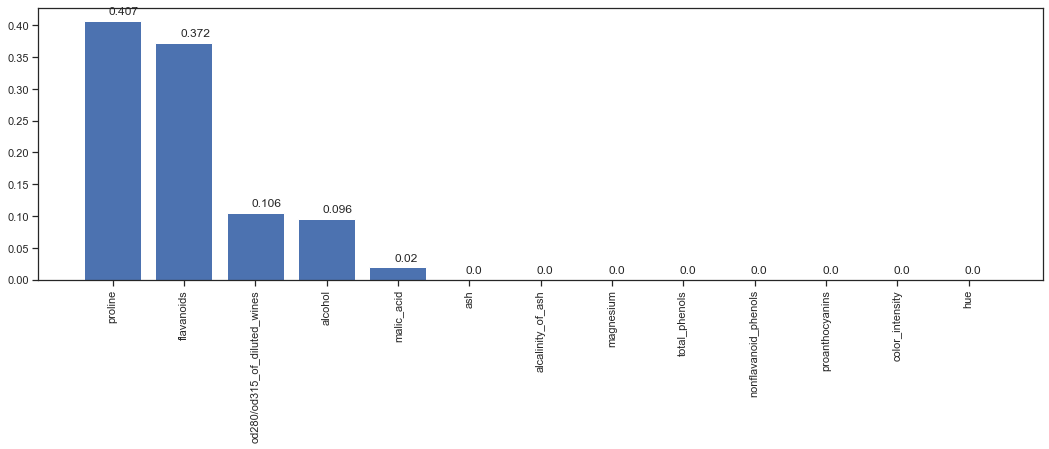

(['proline',
  'flavanoids',
  'od280/od315_of_diluted_wines',
  'alcohol',
  'malic_acid',
  'ash',
  'alcalinity_of_ash',
  'magnesium',
  'total_phenols',
  'nonflavanoid_phenols',
  'proanthocyanins',
  'color_intensity',
  'hue'],
 [0.40685320507448963,
  0.37183383991894625,
  0.1055713952247566,
  0.09605902009926777,
  0.019682539682539673,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0])

In [20]:
draw_feature_importances(DecisionTreeModel, data.drop(["class"], axis=1))